In [1]:
import pandas as pd
import joblib
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.metrics import median_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


data = pd.read_csv('data_analyst_salary_2024.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_type         1194 non-null   object 
 1   job_location     1194 non-null   object 
 2   analyst_type     1194 non-null   object 
 3   company_type     1209 non-null   object 
 4   is_manager       1194 non-null   object 
 5   is_python        611 non-null    object 
 6   is_data_analyst  1210 non-null   object 
 7   is_ml            1194 non-null   object 
 8   is_sql           1194 non-null   object 
 9   is_full_time     1129 non-null   object 
 10  education        1192 non-null   object 
 11  viz_tool         1194 non-null   object 
 12  year_of_surv     1210 non-null   int64  
 13  exp              1194 non-null   float64
 14  salary           1115 non-null   float64
dtypes: float64(2), int64(1), object(12)
memory usage: 141.9+ KB


In [2]:
data.salary.describe()


count     1115.000000
mean     19496.507623
std       8366.956802
min          0.000000
25%      14000.000000
50%      19000.000000
75%      24000.000000
max      70000.000000
Name: salary, dtype: float64

### drop unnecessary data

In [3]:
# drop if no salary
data.dropna(subset=['salary'], inplace=True)



In [4]:
# Find extrame sample
z_scores = stats.zscore(data['salary'])
abs_z_scores = abs(z_scores)

# Define the condition for outliers
outliers = abs_z_scores > 3

df_filtered = data[outliers]
df_filtered

,job_type,job_location,analyst_type,company_type,is_manager,is_python,is_data_analyst,is_ml,is_sql,is_full_time,education,viz_tool,year_of_surv,exp,salary
810,שכירה,מרכז,All kind of data analysis,הייטק,כן,כן,כן,לעיתים נדירות,כן,מלאה,כלכלה / פיננסים / חשבונאות,Python/R,2022,10.0,45000.0
811,שכירה,אזור תל אביב,All kind of data analysis,הייטק,כן,כן,כן,לעיתים נדירות,כן,מלאה,סטטיסטיקה,Tableau,2022,10.0,45000.0
812,שכירה,אזור תל אביב,All kind of data analysis,הייטק (גלובלי),לא,כן,כן,לעיתים נדירות,כן,מלאה,סטטיסטיקה,Looker,2022,5.0,45000.0
813,שכירה,מרכז,All kind of data analysis,הייטק (גלובלי),כן,כן,כן,לא,כן,מלאה,הנדסת תעשיה וניהול,Other,2022,20.0,70000.0
1183,שכירה,אזור תל אביב,All kind of data analysis,הייטק,כן,כן,כן,כן,כן,מלאה,הנדסת תעשיה וניהול,Tableau,2024,9.0,45000.0
1184,שכירה,מרכז,All kind of data analysis,תעשייה ישראלית,לא,לעיתים נדירות,כן,כן,כן,מלאה,סטטיסטיקה,Other,2024,17.0,45000.0
1185,שכירה,אזור תל אביב,All kind of data analysis,הייטק,כן,לעיתים נדירות,כן,לעיתים נדירות,כן,מלאה,כלכלה / פיננסים / חשבונאות,Tableau,2024,11.0,48000.0
1186,שכירה,אזור תל אביב,All kind of data analysis,הייטק,כן,לא,כן,כן,כן,מלאה,כלכלה / פיננסים / חשבונאות,Power BI,2024,10.0,65000.0
1187,שכירה,צפון,All kind of data analysis,תעשייה ישראלית,כן,לא,כן,לא,כן,מלאה,אין תואר,Power BI,2024,2.0,70000.0


In [5]:
data.sort_values(by='salary', ascending=True, inplace=True)
data[:20]

,job_type,job_location,analyst_type,company_type,is_manager,is_python,is_data_analyst,is_ml,is_sql,is_full_time,education,viz_tool,year_of_surv,exp,salary
0,שכירה,מרכז,All kind of data analysis,הייטק,לא,NaN,כן,כן,כן,מלאה,כלכלה / פיננסים / חשבונאות,Qlik,2020,15.0,0.0
274,שכירה,מרכז,BI,הייטק (גלובלי),לא,NaN,כן,לא,לא,מלאה,כלכלה,Tableau,2021,8.0,0.0
275,שכירה,מרכז,Data sceintist,הייטק,לא,NaN,כן,לא,כן,חצי משרה,מדעי המחשב,Redash,2021,0.8,0.0
276,שכירה,אזור תל אביב,All kind of data analysis,הייטק,לא,NaN,כן,כן,כן,מלאה,חשבונאות,Looker,2021,4.0,0.0
277,שכירה,מרכז,BI,הייטק,לא,NaN,כן,לא,כן,מלאה,כלכלה,Power BI,2021,5.0,0.0
278,שכירה,אזור תל אביב,All kind of data analysis,הייטק (גלובלי),לא,NaN,כן,לא,כן,מלאה,הנדסת תעשיה וניהול,Looker,2021,10.0,0.0
279,שכירה,אזור תל אביב,Product,הייטק,כן,NaN,כן,לא,כן,מלאה,הנדסת תעשיה וניהול,Other,2021,7.0,0.0
280,שכירה,מרכז,BI,אחר,כן,NaN,כן,לעיתים נדירות,כן,חצי משרה,הנדסת תעשיה וניהול,Qlik,2021,10.0,0.0
273,שכירה,מרכז,BI,צהל,לא,NaN,כן,לעיתים נדירות,לעיתים נדירות,מלאה,אין תואר,Power BI,2021,3.0,0.0
272,שכירה,מרכז,other,הייטק (גלובלי),לא,NaN,כן,לא,כן,מלאה,מדעי הטבע,Other,2021,0.0,0.0


In [6]:
# droping outliers
data=data[data.salary>=8000]
data=data[data.salary<=50000]
data.salary.describe()


count     1043.000000
mean     20301.635666
std       7293.887449
min       8000.000000
25%      15000.000000
50%      19500.000000
75%      24375.000000
max      48000.000000
Name: salary, dtype: float64

### Analyzing categorical features

In [7]:
for column in data.columns:
    # Check if the column is of object type
    if data[column].dtype == 'object':
        print(f"Value counts for {column}:")
        print(data[column].value_counts())
        print("\n")  # Print a new line for readability between columns

Value counts for job_type:
job_type
שכירה             974
שכיר               53
לא מועסקת כרגע     11
לא מועסק כרגע       4
עצמאית              1
Name: count, dtype: int64


Value counts for job_location:
job_location
אזור תל אביב    532
מרכז            358
אזור ירושלים     49
אזור חיפה        28
צפון             27
עבודה מהבית      24
אזור השפלה       12
דרום              8
אזור באר שבע      5
Name: count, dtype: int64


Value counts for analyst_type:
analyst_type
All kind of data analysis    324
Business analyst             175
Product                      167
BI                           104
Financial Analyst             91
Marketing                     69
other                         61
Data sceintist                25
Web Analyst                   14
Fraud Analyst                 13
Name: count, dtype: int64


Value counts for company_type:
company_type
הייטק             419
תעשייה ישראלית    305
הייטק (גלובלי)    252
אחר                36
צהל                16
ממשלתיח           

In [8]:
# keeping only emplyees
data= data.loc[data['job_type'].isin(['שכירה', 'שכיר'])]
data.drop(columns=['job_type'], inplace=True)

# droping column- all "yes" 
data = data.drop(columns=['is_data_analyst'])

#keeping only full time
data = data[data['is_full_time'] == 'מלאה']
data.drop(columns=['is_full_time'], inplace=True)


# grouping 
data.loc[data['job_location'].isin(['צפון','דרום','אזור חיפה','אזור ירושלים','אזור באר שבע', 'אזור השפלה']), 'job_location'] = 'שאר הארץ'
data.loc[data['analyst_type'].isin(['Web Analyst', 'Fraud Analyst','All kind of data analysis','Product','Business analyst']), 'analyst_type'] = 'Business/Data analyst' 
data.loc[data['company_type'].isin(['צהל', 'ממשלתיח']), 'company_type'] = 'אחר'
data.loc[data['company_type'].isin(['הייטק (גלובלי)']), 'company_type'] = 'הייטק'
data['education'] = data['education'].fillna('אחר')
data.loc[data['education'].isin(['מנהל עסקים','חשבונאות','כלכלה','כלכלה / פיננסים / חשבונאות']), 'education'] = 'כלכלה / פיננסים / חשבונאות/מנהל עסקים'
data.loc[data['education'].isin(['מדעי הטבע','מדעי המחשב']), 'education'] = 'מדעים מדויקים'
data.loc[data['education'].isin(['הנדסת תעשיה וניהול','מערכות מידע']), 'education'] = 'הנדסה תעשיה וניהול/ מערכות מידע'
data.loc[data['viz_tool'].isin(['Redash','Google Data studio','1','Mixpanel','Grafana','no_data','other']), 'viz_tool'] = 'Other'
data.loc[data['viz_tool'].isin(['Looker','Qlik','Python/R']), 'viz_tool'] = 'Looker/Qlik/Python/R'
data['is_python'].fillna(data['is_ml'], inplace=True)






In [9]:
for column in data.columns:
    # Check if the column is of object type
    if data[column].dtype == 'object':
        print(f"Value counts for {column}:")
        print(data[column].value_counts())
        print("\n")  # Print a new line for readability between columns

Value counts for job_location:
job_location
אזור תל אביב    512
מרכז            341
שאר הארץ        123
עבודה מהבית      22
Name: count, dtype: int64


Value counts for analyst_type:
analyst_type
Business/Data analyst    659
BI                       101
Financial Analyst         88
Marketing                 68
other                     59
Data sceintist            23
Name: count, dtype: int64


Value counts for company_type:
company_type
הייטק             636
תעשייה ישראלית    300
אחר                62
Name: count, dtype: int64


Value counts for is_manager:
is_manager
לא    805
כן    193
Name: count, dtype: int64


Value counts for is_python:
is_python
לא               535
כן               265
לעיתים נדירות    198
Name: count, dtype: int64


Value counts for is_ml:
is_ml
לא               603
לעיתים נדירות    220
כן               175
Name: count, dtype: int64


Value counts for is_sql:
is_sql
כן               793
לא               134
לעיתים נדירות     71
Name: count, dtype: int64


Val

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 839 to 1185
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   job_location  998 non-null    object 
 1   analyst_type  998 non-null    object 
 2   company_type  998 non-null    object 
 3   is_manager    998 non-null    object 
 4   is_python     998 non-null    object 
 5   is_ml         998 non-null    object 
 6   is_sql        998 non-null    object 
 7   education     998 non-null    object 
 8   viz_tool      998 non-null    object 
 9   year_of_surv  998 non-null    int64  
 10  exp           998 non-null    float64
 11  salary        998 non-null    float64
dtypes: float64(2), int64(1), object(9)
memory usage: 101.4+ KB


In [11]:
class YearToCategoryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Assuming X is a DataFrame for simplicity
        self.feature_names_out_ = X.columns.tolist()  # Capture input feature names
        return self
    
    def transform(self, X, y=None):
        # Transform logic here (your existing transformation code)
        # Example transformation:
        transformed_X = np.digitize(X, bins=[2020, 2021, 2022, 2024])
        return transformed_X

    def get_feature_names_out(self, input_features=None):
        # Return the output feature names
        return self.feature_names_out_

### testing different models

In [12]:


def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Load your data
# Assuming data is already loaded and stored in the variable 'data'

# Drop unnecessary columns and convert 'year_of_surv' to a string
data['year_of_surv_str'] = data['year_of_surv'].astype(str)
col=['company_type','is_manager','is_sql','is_python','year_of_surv','exp','viz_tool','job_location','analyst_type']
col=['company_type','is_manager','is_sql','is_python','year_of_surv','exp','viz_tool','analyst_type']

# Identify categorical and numerical columns
categorical_cols = data[col].select_dtypes(include=['object']).columns.tolist()
numerical_cols = ['exp']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore',drop='first'), categorical_cols),
        ('num', StandardScaler(), numerical_cols),
        ('year_custom', YearToCategoryTransformer(), ['year_of_surv'])  # Apply custom transformation to 'year'

    ])

# Split the data
X = data.drop('salary', axis=1)
X = data[col]
y = data['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Initialize and train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, max_depth=2, random_state=42),
    "XGBRegressor": XGBRegressor(n_estimators=100, max_depth=2, random_state=42),
}

# Perform K-fold cross-validation and print results
for name, model in models.items():
    cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Define K-fold cross-validation
    scores = cross_val_score(model, X_train_preprocessed, y_train, scoring='neg_mean_absolute_error', cv=cv)
    model.fit(X_train_preprocessed, y_train)
    y_test_pred = model.predict(X_test_preprocessed)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

    y_train_pred = model.predict(X_train_preprocessed)
    train_mae = mean_absolute_error(y_train, y_train_pred)

    print(f"{name} Cross-validated MAE: {int(-scores.mean())} - Train MAE: {int(train_mae)} - Test MAE: {int(test_mae)} Test MAPE: {int(test_mape)}")


Linear Regression Cross-validated MAE: 3522 - Train MAE: 3418 - Test MAE: 3912 Test MAPE: 19
Random Forest Cross-validated MAE: 3856 - Train MAE: 3695 - Test MAE: 4255 Test MAPE: 21
Gradient Boosting Cross-validated MAE: 3317 - Train MAE: 2983 - Test MAE: 3697 Test MAPE: 18
XGBRegressor Cross-validated MAE: 3420 - Train MAE: 2867 - Test MAE: 3632 Test MAPE: 17


### finding best parmeters for Gradient Boosting

In [13]:



# Example parameter grid
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [2,3,4],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [2,3,4,5]
}


# Initialize the estimator
gbr = GradientBoostingRegressor(random_state=42)

    
# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit it to your data
grid_search.fit(X_train_preprocessed, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)


best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_preprocessed)
y_train_pred = best_model.predict(X_train_preprocessed)



test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
medae = median_absolute_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
medae = median_absolute_error(y_train, y_train_pred)

print(f"{'GradientBoost'} Cross-validated MAE: {int(-grid_search.best_score_.mean())} - Train MAE: {int(train_mae)} - Test MAE: {int(test_mae)} Test MAPE: {int(test_mape)}")





Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
GradientBoost Cross-validated MAE: 3360 - Train MAE: 3011 - Test MAE: 3757 Test MAPE: 18


###  feature_importance

In [14]:
dic={
 'cat__company_type_אחר': 'company_type_Other',
 'cat__company_type_הייטק': 'company_type_Hi-tech',
 'cat__company_type_תעשייה ישראלית': 'company_type_Israeli Industry',
 'cat__is_manager_כן': 'is_manager_Yes',
 'cat__is_manager_לא': 'is_manager_No',
 'cat__is_sql_כן': 'is_sql_Yes',
 'cat__is_sql_לא': 'is_sql_No',
 'cat__is_sql_לעיתים נדירות': 'is_sql_Rarely',
 'cat__is_python_כן': 'is_python_Yes',
 'cat__is_python_לא': 'is_python_No',
 'cat__is_python_לעיתים נדירות': 'is_python_Rarely',
 'cat__year_of_surv_2020': 'year_of_surv_2020',
 'cat__year_of_surv_2021': 'year_of_surv_2021',
 'cat__year_of_surv_2022': 'year_of_surv_2022',
 'cat__year_of_surv_2024': 'year_of_surv_2024',
 'cat__viz_tool_Excel': 'viz_tool_Excel',
 'cat__viz_tool_Looker/Qlik/Python/R': 'viz_tool_Looker/Qlik/Python/R',
 'cat__viz_tool_Other': 'viz_tool_Other',
 'cat__viz_tool_Power BI': 'viz_tool_Power BI',
 'cat__viz_tool_Tableau': 'viz_tool_Tableau',
 'cat__viz_tool_other': 'viz_tool_other',
 'cat__viz_tool_No Tool': 'viz_tool_No_Tool',

 'cat__analyst_type_BI': 'analyst_type_BI',
 'cat__analyst_type_Business/Data analyst': 'analyst_type_Business/Data analyst',
 'cat__analyst_type_Data sceintist': 'analyst_type_Data sceintist',
 'cat__analyst_type_Financial Analyst': 'analyst_type_Financial Analyst',
 'cat__analyst_type_Marketing': 'analyst_type_Marketing',
 'cat__analyst_type_other': 'analyst_type_other',
 'num__exp': 'num__exp'
}


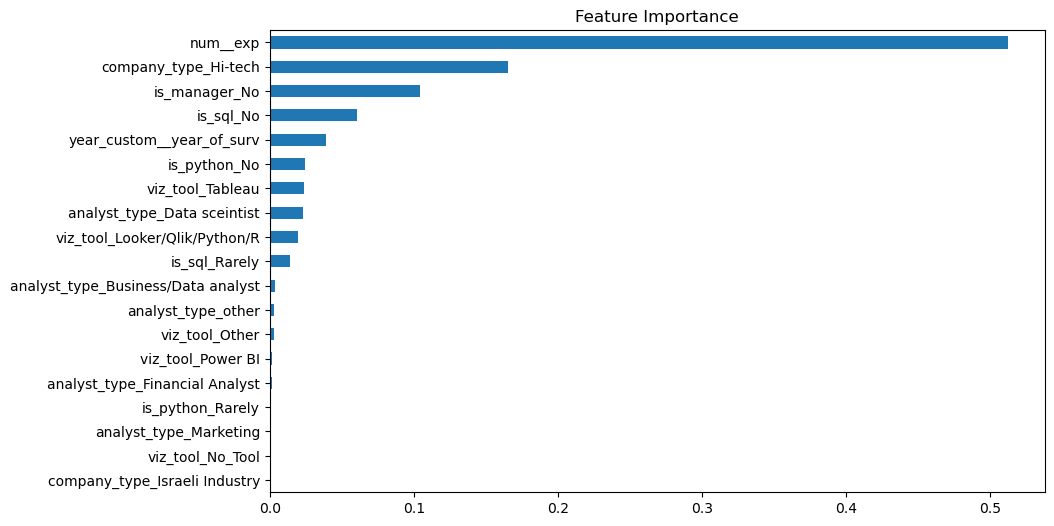

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming xgboost_adjusted is your trained XGBRegressor model
importances = best_model.feature_importances_

# Assuming you have the feature names accessible
# For example, if you used a ColumnTransformer with one-hot encoding,
# you might need to get the output feature names like so:
feature_names = preprocessor.get_feature_names_out()

feature_names_new=[]
for feature in feature_names:
    if feature in dic:
        feature_names_new.append(dic[feature])
    else:
        feature_names_new.append(feature)


# Create a pandas Series for easy plotting
feature_importance_original = pd.Series(importances, index=feature_names)
feature_importance_series = pd.Series(importances, index=feature_names_new)

# Plotting
feature_importance_series.sort_values(ascending=True).plot.barh(figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

### Trying to run the model with less features (didnt work)

In [16]:
from scipy.sparse import csr_matrix

def change_to_df(data_to_change,features,count):
    top_x_features = features.sort_values(ascending=False).head(count)
    top_x_features = top_x_features.index.tolist()
# If data_to_change is a sparse matrix
    if isinstance(data_to_change, csr_matrix):
        X_train_preprocessed_df = pd.DataFrame(data_to_change.toarray(), columns=feature_names)
    else:
        X_train_preprocessed_df = pd.DataFrame(data_to_change, columns=feature_names)

    return X_train_preprocessed_df[top_x_features]

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.metrics import median_absolute_error


# Example parameter grid

# Initialize the estimator


for count in [10,12,14,15,16,18,20,24,26,28,30]:

    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)

    X_train_preprocessed=change_to_df(X_train_preprocessed,feature_importance_original,count)
    X_test_preprocessed = change_to_df(X_test_preprocessed,feature_importance_original,count)


    gbr = GradientBoostingRegressor(random_state=42,
                                    learning_rate= 0.1,
                                    max_depth= 2, 
                                    min_samples_leaf= 4, 
                                    min_samples_split= 2, 
                                    n_estimators= 100)


    cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Define K-fold cross-validation
    scores = cross_val_score(gbr, X_train_preprocessed, y_train, scoring='neg_mean_absolute_error', cv=cv)    
    gbr.fit(X_train_preprocessed, y_train)
    y_test_pred = gbr.predict(X_test_preprocessed)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    
    y_train_pred = gbr.predict(X_train_preprocessed)
    train_mae = mean_absolute_error(y_train, y_train_pred)


    print(f"{count} features - Cross-validated MAE: {int(-scores.mean())} - Train MAE: {int(train_mae)} - Test MAE: {int(test_mae)} Test MAPE: {int(test_mape)}")



predictions = {'Results': y_test, 'Predictions': y_test_pred}

# Combine predictions into a DataFrame
predictions_df = pd.DataFrame(predictions)


10 features - Cross-validated MAE: 3291 - Train MAE: 3035 - Test MAE: 3774 Test MAPE: 18
12 features - Cross-validated MAE: 3316 - Train MAE: 3028 - Test MAE: 3775 Test MAPE: 18
14 features - Cross-validated MAE: 3314 - Train MAE: 3024 - Test MAE: 3773 Test MAPE: 18
15 features - Cross-validated MAE: 3310 - Train MAE: 3018 - Test MAE: 3754 Test MAPE: 18
16 features - Cross-validated MAE: 3309 - Train MAE: 3008 - Test MAE: 3747 Test MAPE: 18
18 features - Cross-validated MAE: 3307 - Train MAE: 3008 - Test MAE: 3745 Test MAPE: 18
20 features - Cross-validated MAE: 3311 - Train MAE: 3002 - Test MAE: 3756 Test MAPE: 18
24 features - Cross-validated MAE: 3311 - Train MAE: 3002 - Test MAE: 3756 Test MAPE: 18
26 features - Cross-validated MAE: 3311 - Train MAE: 3002 - Test MAE: 3756 Test MAPE: 18
28 features - Cross-validated MAE: 3311 - Train MAE: 3002 - Test MAE: 3756 Test MAPE: 18
30 features - Cross-validated MAE: 3311 - Train MAE: 3002 - Test MAE: 3756 Test MAPE: 18


### final result

In [18]:
X_all_data_preprocessed=preprocessor.fit_transform(X)
gbr.fit(X_all_data_preprocessed,y)
y_pred = gbr.predict(X_all_data_preprocessed)

test_mae = mean_absolute_error(y, y_pred)
test_mape = mean_absolute_percentage_error(y, y_pred)

print(f"MAE: {int(test_mae)} MAPE: {int(test_mape)}")
joblib.dump(gbr,'gradient_boosting_regressor_model.pkl')
joblib.dump(preprocessor, 'preprocessor.joblib')


MAE: 3097 MAPE: 16


['preprocessor.joblib']